## Number Recognition using MNIST dataset

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 19s 9ms/step - loss: 0.2345 - accuracy: 0.9314
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1017 - accuracy: 0.9690
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0702 - accuracy: 0.9777
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0535 - accuracy: 0.9832
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0428 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0353 - accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0284 - accuracy: 0.9903
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0255 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0217 - accuracy: 0.9927
Epoch 10/10
187

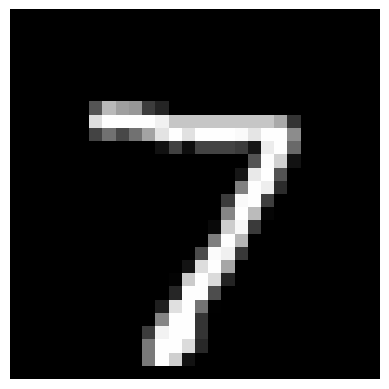

1/1 [==============================] - 0s 93ms/step
Predicted Label: 7


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy:', accuracy)

# Example: Predicting a handwritten digit
index = 0  # Choose an index from the test set
image = X_test[index].reshape((28, 28))
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

prediction = model.predict(X_test[index].reshape((1, 28 * 28)))
predicted_label = np.argmax(prediction)
print('Predicted Label:', predicted_label)
